In [ ]:
!pip install scikit-learn
!pip install dataprep
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
import scipy
from scipy import stats

In [ ]:
dat= pd.read_csv("/content/drive/MyDrive/Project375Regression")
dat

In [ ]:
data= pd.read_csv("/content/drive/MyDrive/Project375Regression/insurance.csv")
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


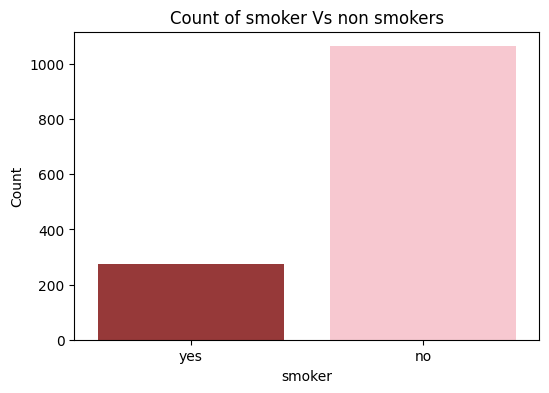

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x=data['smoker'],palette=['brown','pink'])
plt.title("Count of smoker Vs non smokers")
plt.xlabel("smoker")
plt.ylabel("Count")
plt.show()

We can see from the plot that the number of non smokers is a lot than smokers,hence we can say non smokers are more likely to get a medical insurance.

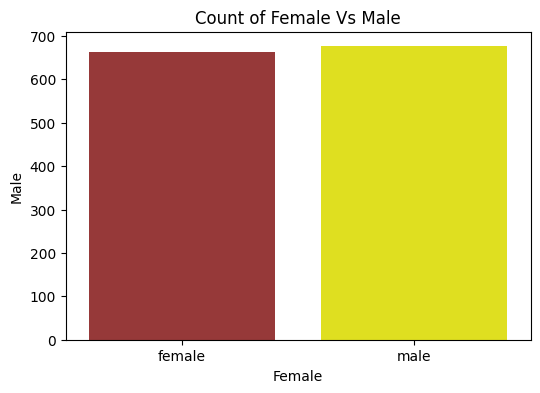

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x=data['sex'],palette=['brown','yellow'])
plt.title("Count of Female Vs Male")
plt.xlabel("Female")
plt.ylabel("Male")
plt.show()

We can infer from the Data that the data set has almost same number of Females and Males in the Dataset and offering a medical insurance would not affect the gender.

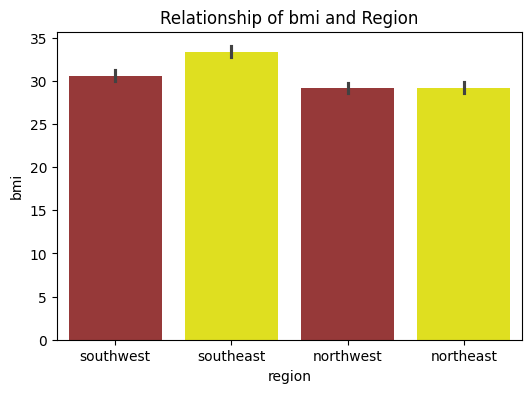

In [ ]:


plt.figure(figsize=(6,4))
sns.barplot(x=data['region'],y=data['bmi'],hue=data['region'],palette=['brown','yellow'] )
plt.title("Relationship of bmi and Region")
plt.xlabel("region")
plt.ylabel("bmi")
plt.show()

<Figure size 800x400 with 0 Axes>

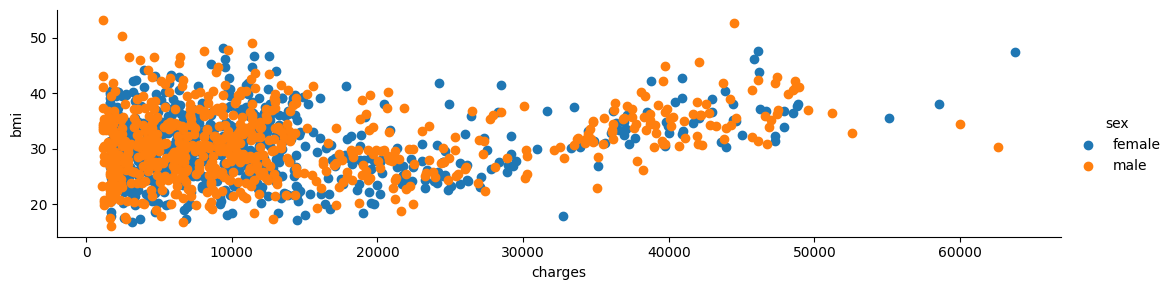

In [ ]:
plt.figure(figsize=(8,4))
fg = sns.FacetGrid(data=data, hue='sex',aspect=3.61)
fg.map(plt.scatter, 'charges', 'bmi').add_legend()
plt.show()

We can infer that there are a lot of males and females who are charged more than 20K as medical insurance and their bmi lies between 0 to 40 and there are lesser number of males and females who are charged more than 20K and less than 40k and their bmi ranges between approx btw 20 to 30 and further 40k and beyond is charged with bmi ranges between 30 to 50.



In [ ]:
for i in data.iloc[:,[1,4,5]]:
  encod= LabelEncoder()
  data[i]=encod.fit_transform(data[i])

In [ ]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


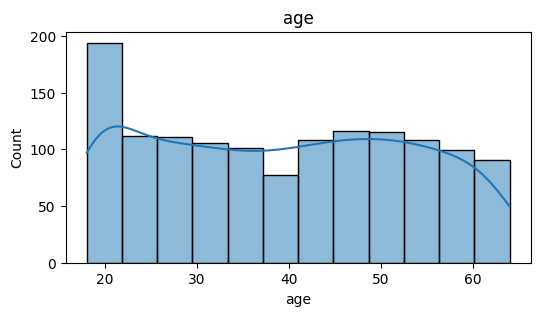

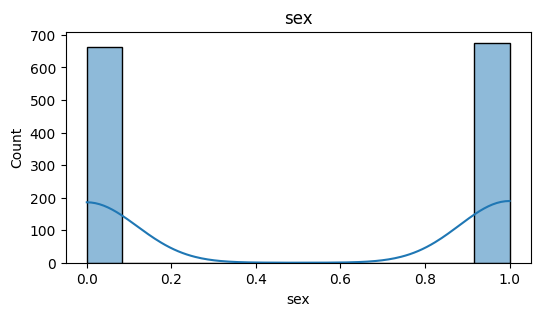

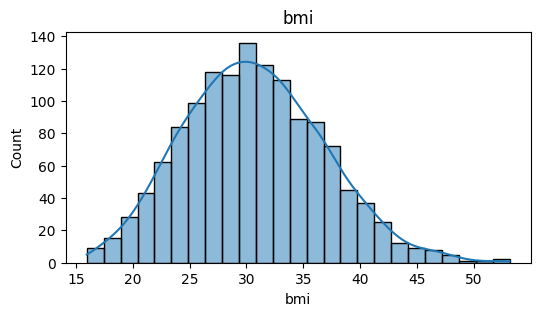

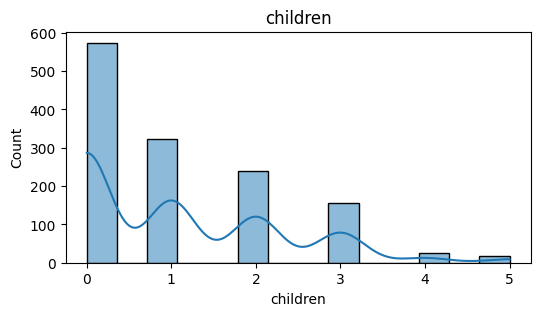

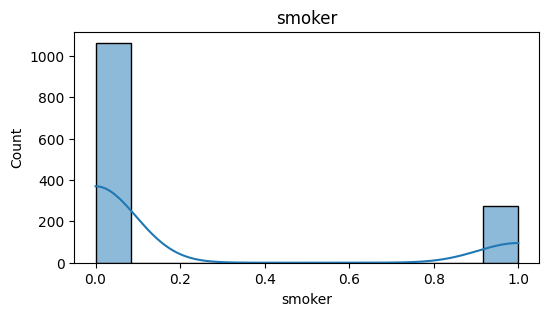

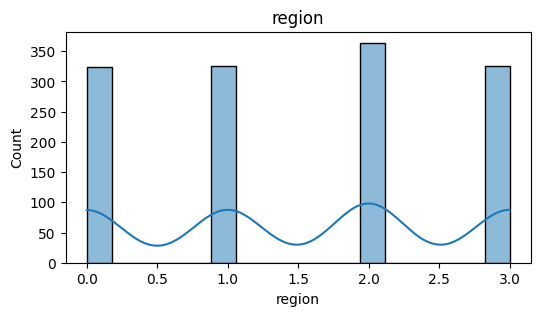

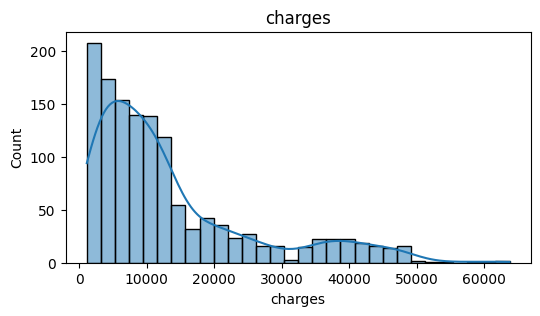

In [ ]:
for i in data.iloc[0:5]:
   plt.figure(figsize=(6,3))
   plt.title(i)
   sns.histplot(data[i],kde=True)
   plt.show()

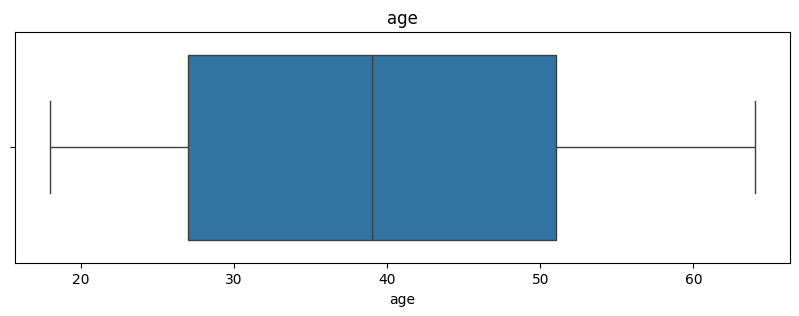

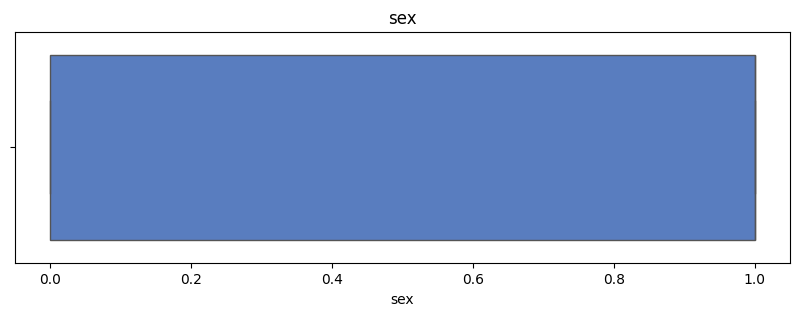

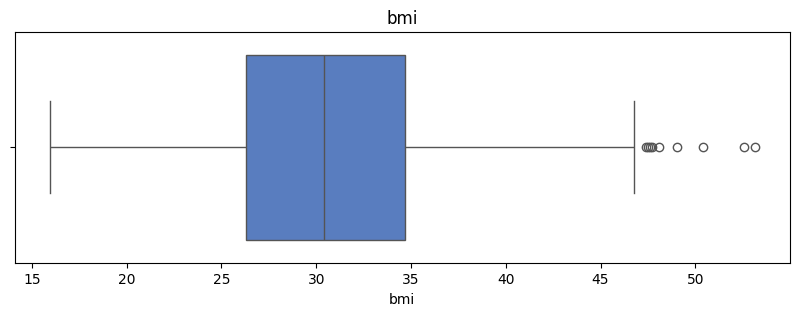

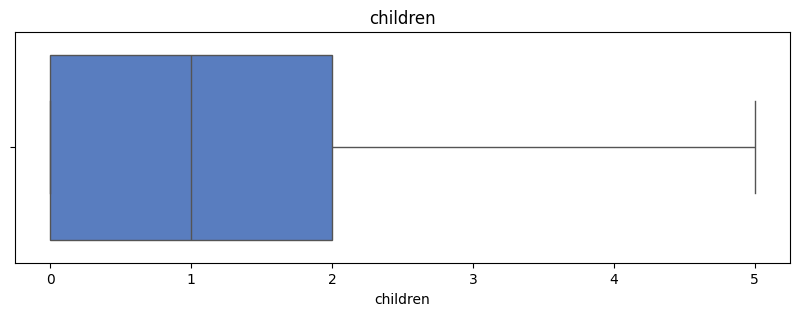

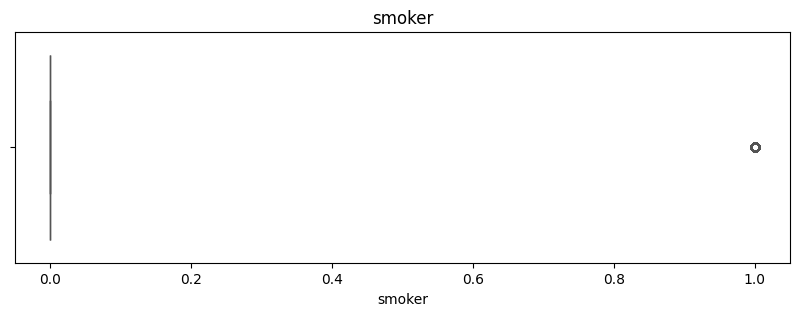

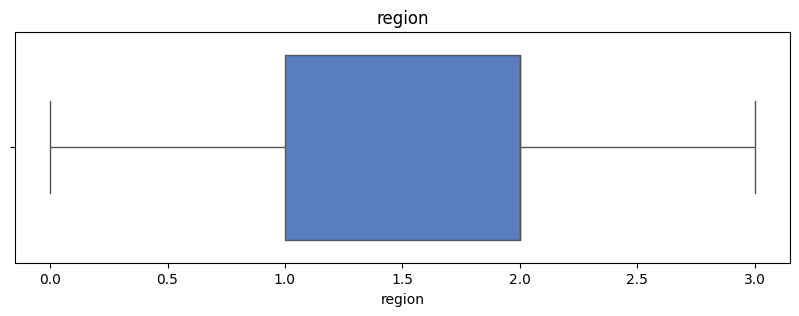

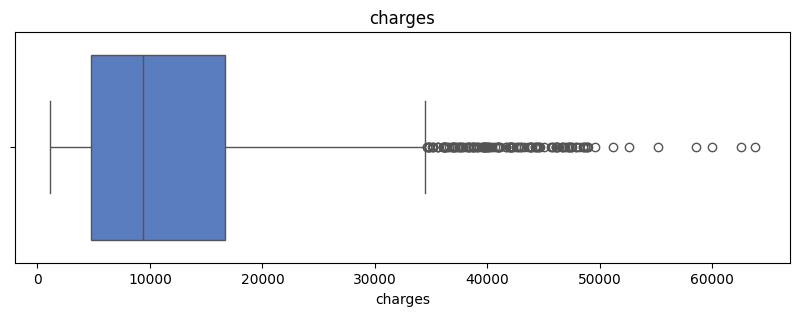

In [ ]:

for i in data.columns:
  plt.figure(figsize=(10,3))
  plt.title(i)
  sns.boxplot(x=data[i],vert=False,palette=sns.set_palette("muted"))
  plt.show()

In [ ]:
data.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


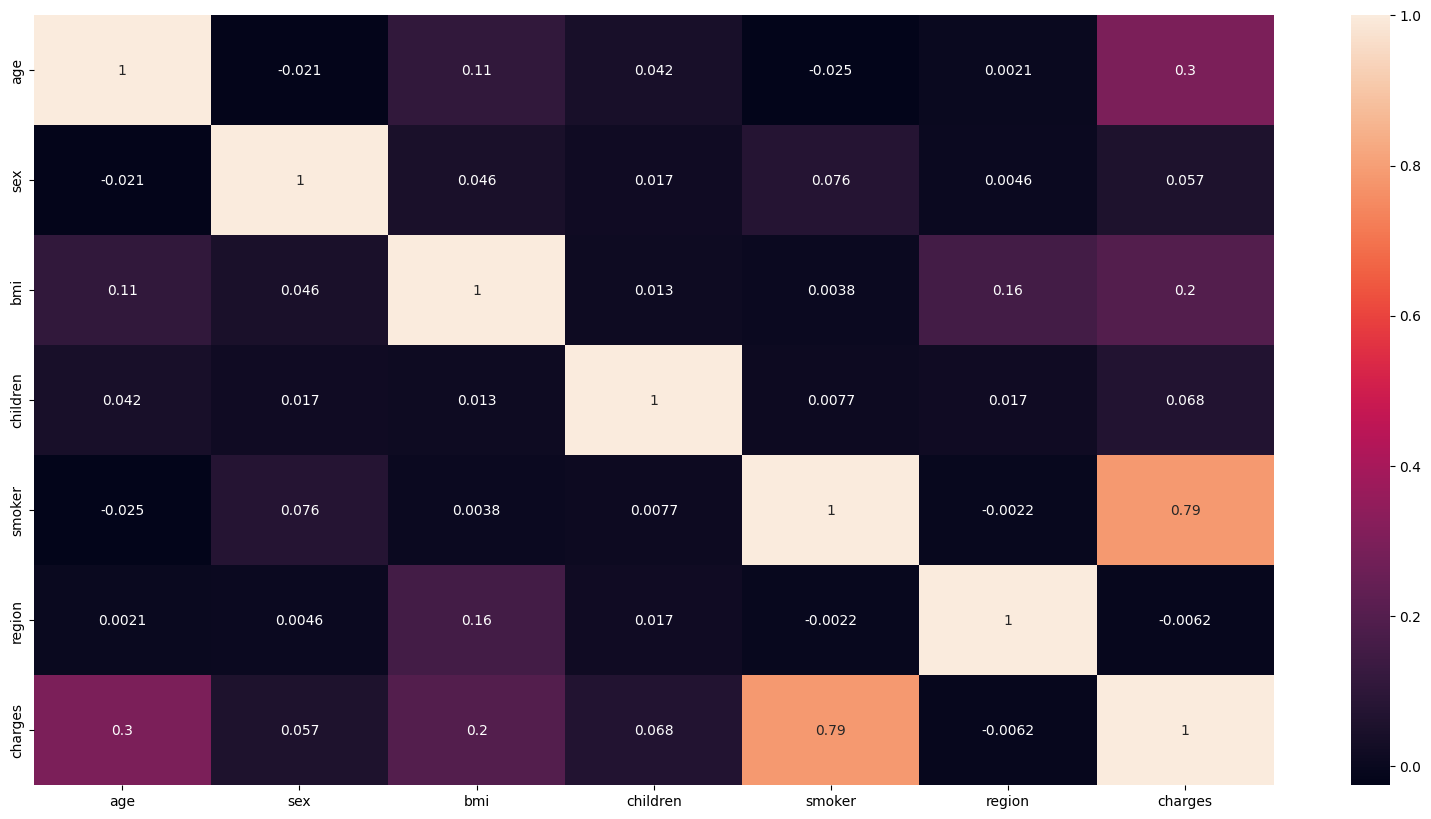

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True,cmap=sns.set_palette("muted"))
plt.show()

Inference:
Smoker and charges are highly corelated with --->79%
Age and charges ---> 3%
BMI and charges ---> 2%
BMI and region --->1%
BMI and age --->1%


In [ ]:
#using annova test finding the best features which are most corelated



annova_results = pd.DataFrame(columns=['Feature', 'F_value', 'P_value'])


#age Vs smoker
result1=stats.f_oneway(data['age'],data['smoker'])
annova_results = annova_results.append({'Feature': "age Vs smoker",
                                            'F_value': result1[0],
                                            'P_value': result1[1]},
                                           ignore_index=True)
#age Vs bmi
result2=stats.f_oneway(data['age'],data['bmi'])
annova_results = annova_results.append({'Feature': "age Vs bmi",
                                            'F_value': result2[0],
                                            'P_value': result2[1]},
                                           ignore_index=True)

#bmi Vs region
result3=stats.f_oneway(data['bmi'],data['region'])
annova_results = annova_results.append({'Feature': "bmi Vs region",
                                            'F_value': result3[0],
                                            'P_value': result3[1]},
                                           ignore_index=True)

print(annova_results)

         Feature       F_value       P_value
0  age Vs smoker  10302.121560  0.000000e+00
1     age Vs bmi    416.325187  3.997360e-86
2  bmi Vs region  29596.179832  0.000000e+00


# Inference: Age and BMI are two features which are most corelated as they have the least f_statsistical value

In [ ]:
x= data.iloc[:,:6]
y= data.iloc[:,[6]]
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.20,random_state=15)
print(x)
print(y)

      age  sex     bmi  children  smoker  region
0      19    0  27.900         0       1       3
1      18    1  33.770         1       0       2
2      28    1  33.000         3       0       2
3      33    1  22.705         0       0       1
4      32    1  28.880         0       0       1
...   ...  ...     ...       ...     ...     ...
1333   50    1  30.970         3       0       1
1334   18    0  31.920         0       0       0
1335   18    0  36.850         0       0       2
1336   21    0  25.800         0       0       3
1337   61    0  29.070         0       1       1

[1338 rows x 6 columns]
          charges
0     16884.92400
1      1725.55230
2      4449.46200
3     21984.47061
4      3866.85520
...           ...
1333  10600.54830
1334   2205.98080
1335   1629.83350
1336   2007.94500
1337  29141.36030

[1338 rows x 1 columns]


In [ ]:
scaled= MinMaxScaler()
x_train_scaled= scaled.fit_transform(x_train)
x_test_scaled= scaled.transform(x_test)
print(x_train_scaled.shape)
print(x_test_scaled.shape)
print(y_train.shape)
print(y_test.shape)

(1070, 6)
(268, 6)
(1070, 1)
(268, 1)


In [ ]:
from sklearn.decomposition import PCA
pca= PCA(n_components=0.95)
x_train_pca= pca.fit_transform(x_train_scaled)
x_test_pca= pca.transform(x_test_scaled)


In [ ]:
y_train.shape

(1070, 1)

In [ ]:
pca1=np.round(pca.explained_variance_ratio_,2)
pca1

array([0.35, 0.22, 0.19, 0.13, 0.08])

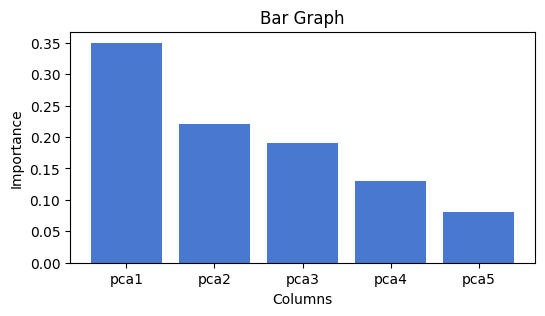

In [ ]:
plt.figure(figsize=(6,3))
series = [0.35, 0.22, 0.19, 0.13, 0.08]
labels=['pca1', 'pca2', 'pca3','pca4','pca5']
plt.bar(labels,series)
plt.title('Bar Graph')
plt.xlabel('Columns')
plt.ylabel('Importance')
plt.show()

# Model building

In [ ]:
#linear Regression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
import statsmodels.formula.api as smf



model1= LinearRegression()
model1= model1.fit(x_train_pca,y_train)

train_prediction= model1.predict(x_train_pca)
test_prediction= model1.predict(x_test_pca)

train_rmse=np.sqrt(mean_squared_error(y_train,train_prediction))
test_rmse=np.sqrt(mean_squared_error(y_test,test_prediction))

print("The train RMSE=",train_rmse)
print("The test RMSE=",test_rmse)
print("****************************************************")



#linear Regression using OLS

model2= smf.ols('charges ~ (age + sex + bmi + children + smoker + region)',data=data).fit()
print(model2.summary())
print("***************************************************")

model3= smf.ols("np.log(charges)~(age + sex + bmi + children + smoker + region)",data=data).fit()
print(model3.summary())
model3.mse_model



The train RMSE= 6439.417050538879
The test RMSE= 5751.2150805762285
****************************************************
                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     668.1
Date:                Sat, 06 Apr 2024   Prob (F-statistic):               0.00
Time:                        15:09:59   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1331   BIC:                         2.715e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------

144.511457636812

In [ ]:
#Decision tree using grid search

from sklearn.tree import DecisionTreeRegressor,plot_tree
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

model4= DecisionTreeRegressor()

parameters={'criterion':['squared_error','absolute_error'],
            'max_depth' :[3,4,5,6],
             'max_features':['auto','sqrt','log2'],'min_samples_split':[2,3,4,5,6,7,8,9,10]}

model4= GridSearchCV(estimator=model4,param_grid= parameters,cv=3)
model4=model4.fit(x_train_pca,y_train)

print(model4.best_params_)
print(model4.best_score_)

train_prediction=model4.predict(x_train_pca)
test_prediction=model4.predict(x_test_pca)

train_rmse= np.sqrt(mean_squared_error(y_train,train_prediction))
test_rmse= np.sqrt(mean_squared_error(y_test,test_prediction))

print("Decision tree using grid search")
print("The train RMSE =",train_rmse)
print("The test RMSE =",test_rmse)



# Decision Tree without grid search

model10= DecisionTreeRegressor(criterion='squared_error',max_depth=4,min_samples_split=4)
model10=model10.fit(x_train_pca,y_train)

train_prediction=model10.predict(x_train_pca)
test_prediction=model10.predict(x_test_pca)

train_rmse= np.sqrt(mean_squared_error(y_train,train_prediction))
test_rmse= np.sqrt(mean_squared_error(y_test,test_prediction))

print("Decision Tree without grid search ")
print("The train RMSE =",train_rmse)
print("The test RMSE =",test_rmse)


{'criterion': 'squared_error', 'max_depth': 6, 'max_features': 'sqrt', 'min_samples_split': 9}
0.7136336714588092
Decision tree using grid search
The train RMSE = 5193.231575718271
The test RMSE = 5900.076028271253
Decision Tree without grid search 
The train RMSE = 5898.1824833341525
The test RMSE = 5729.548028049631


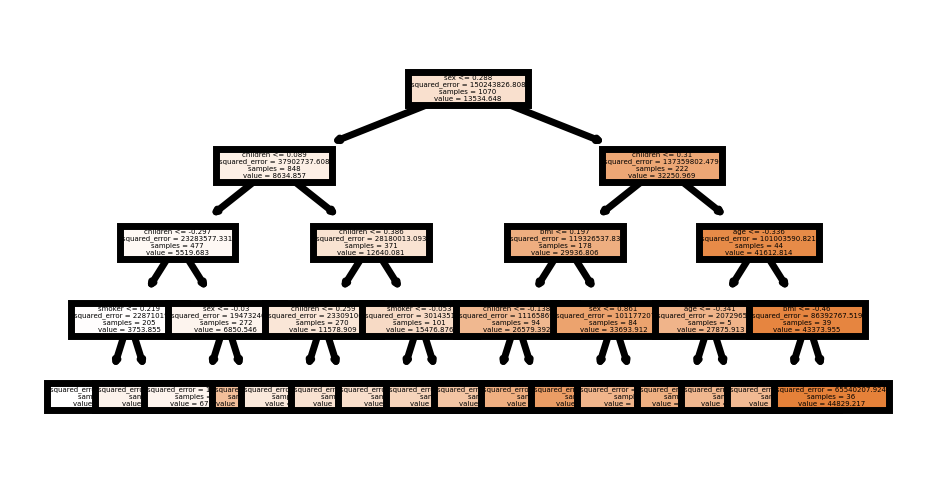

In [ ]:
features=['age', 'sex', 'bmi', 'children', 'smoker', 'region']
plt.subplots(figsize=(2,1),dpi=500)
plot_tree(model10, feature_names= features,filled=True);
plt.show()

In [ ]:
#RandomForest with grid search
model11= RandomForestRegressor()

parameters={'criterion':['squared_error','absolute_error'],
            'max_depth' :[3,4,5,6],
             'max_features':['auto','sqrt','log2'],
            'min_samples_split':[2,3,4,5,6,7,8,9,10],
            'n_estimators':[3,5,7,9,11,13,15,18]}

model11= GridSearchCV(estimator=model4,param_grid= parameters,cv=3)
model11=model4.fit(x_train_pca,y_train)

print(model11.best_params_)
print(model11.best_score_)

train_prediction=model11.predict(x_train_pca)
test_prediction=model11.predict(x_test_pca)

train_rmse= np.sqrt(mean_squared_error(y_train,train_prediction))
test_rmse= np.sqrt(mean_squared_error(y_test,test_prediction))

print("Random Forest using grid search")
print("The train RMSE =",train_rmse)
print("The test RMSE =",test_rmse)




#Random Forest

model5= RandomForestRegressor(criterion='squared_error',max_depth=4,max_features=4,max_samples=4,n_estimators=25)
model5=model5.fit(x_train_pca,y_train)

train_prediction=model5.predict(x_train_pca)
test_prediction= model5.predict(x_test_pca)

train_rmse=np.sqrt(mean_squared_error(y_train,train_prediction))
test_rmse=np.sqrt(mean_squared_error(y_test,test_prediction))

print("rRandom Forest without grid search ")
print("The train RMSE =",train_rmse)
print("The test RMSE =",test_rmse)

{'criterion': 'squared_error', 'max_depth': 4, 'max_features': 'log2', 'min_samples_split': 10}
0.7040699671705294
Random Forest using grid search
The train RMSE = 6413.237786643852
The test RMSE = 5810.264724863421
rRandom Forest without grid search 
The train RMSE = 10296.173947024701
The test RMSE = 9187.25435049455


In [ ]:
#Bagging

model7= BaggingRegressor(n_estimators=50,max_samples=4)
model7=model7.fit(x_train_pca,y_train)

train_prediction= model7.predict(x_train_pca)
test_predicton= model7.predict(x_test_pca)

train_rmse= np.sqrt(mean_squared_error(y_train,train_prediction))
test_rmse= np.sqrt(mean_squared_error(y_test,test_prediction))

print("The train RMSE =",train_rmse)
print("The test RMSE =",test_rmse)


The train RMSE = 10133.095782597075
The test RMSE = 9187.25435049455


In [ ]:
data.shape


(1338, 7)

In [ ]:
#neural networks

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout

model8= Sequential()
model8.add(Dense(units=9,input_dim=5,activation ='relu'))
model8.add(Dropout(0.2))
model8.add(Dense(units=15,activation='relu'))
model8.add(Dropout(0.2))
model8.add(Dense(units=25,activation='tanh'))
model8.add(Dropout(0.2))
model8.add(Dense(units=1))


model8.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 9)                 54        
                                                                 
 dropout (Dropout)           (None, 9)                 0         
                                                                 
 dense_1 (Dense)             (None, 15)                150       
                                                                 
 dropout_1 (Dropout)         (None, 15)                0         
                                                                 
 dense_2 (Dense)             (None, 25)                400       
                                                                 
 dropout_2 (Dropout)         (None, 25)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 2

In [ ]:
model8.compile(metrics=['mse','mae'], optimizer='Adam', loss='mse')


In [ ]:
model8_history=model8.fit(x_train_pca,y_train,epochs=1000,batch_size=100,validation_split=0.3,verbose=2)

Epoch 1/1000
8/8 - 3s - loss: 328398176.0000 - mse: 328398176.0000 - mae: 13453.2578 - val_loss: 345168192.0000 - val_mse: 345168192.0000 - val_mae: 13724.4824 - 3s/epoch - 400ms/step
Epoch 2/1000
8/8 - 0s - loss: 328392992.0000 - mse: 328392992.0000 - mae: 13453.1104 - val_loss: 345163232.0000 - val_mse: 345163232.0000 - val_mae: 13724.3398 - 51ms/epoch - 6ms/step
Epoch 3/1000
8/8 - 0s - loss: 328388576.0000 - mse: 328388576.0000 - mae: 13452.9668 - val_loss: 345157760.0000 - val_mse: 345157760.0000 - val_mae: 13724.1855 - 64ms/epoch - 8ms/step
Epoch 4/1000
8/8 - 0s - loss: 328383040.0000 - mse: 328383040.0000 - mae: 13452.8047 - val_loss: 345151648.0000 - val_mse: 345151648.0000 - val_mae: 13724.0127 - 63ms/epoch - 8ms/step
Epoch 5/1000
8/8 - 0s - loss: 328377088.0000 - mse: 328377088.0000 - mae: 13452.6113 - val_loss: 345144544.0000 - val_mse: 345144544.0000 - val_mae: 13723.8086 - 53ms/epoch - 7ms/step
Epoch 6/1000
8/8 - 0s - loss: 328368512.0000 - mse: 328368512.0000 - mae: 13452.

In [ ]:

print(model8_history.history.keys())

mse = model8_history.history['mse']
val_mse = model8_history.history['val_mse']
print('MSE:', mse)
print('Validation MSE:', val_mse)

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])
MSE: [328398176.0, 328392992.0, 328388576.0, 328383040.0, 328377088.0, 328368512.0, 328360544.0, 328351072.0, 328340864.0, 328328992.0, 328314656.0, 328299520.0, 328283328.0, 328268256.0, 328253408.0, 328236544.0, 328218592.0, 328201792.0, 328182304.0, 328166368.0, 328149696.0, 328137184.0, 328124576.0, 328109184.0, 328098528.0, 328089536.0, 328074368.0, 328067712.0, 328057248.0, 328048096.0, 328038720.0, 328030048.0, 328024928.0, 328018208.0, 328010272.0, 327999520.0, 327991968.0, 327985344.0, 327976928.0, 327970144.0, 327963616.0, 327963072.0, 327950976.0, 327946688.0, 327939552.0, 327929440.0, 327920416.0, 327914656.0, 327907424.0, 327902848.0, 327892896.0, 327888672.0, 327884576.0, 327876992.0, 327868352.0, 327861568.0, 327858464.0, 327848032.0, 327840320.0, 327833984.0, 327827776.0, 327825472.0, 327818528.0, 327813472.0, 327804480.0, 327798688.0, 327797696.0, 327782336.0, 327780000.0, 327775168.0, 327770720.0, 327

Text(0.5, 1.0, 'Actual Vs predicted MSE')

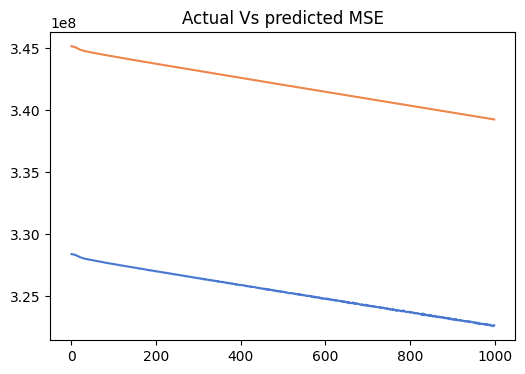

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(model8_history.history['mse'])
plt.plot(model8_history.history['val_mse'])
plt.title("Actual Vs predicted MSE")


In [ ]:
x_train_pca.shape

(1070, 5)

In [ ]:
# SVR
from sklearn import svm
from sklearn.svm import SVR


model9= SVR(kernel='rbf',gamma=0.01).fit(x_train_pca,y_train)

train_prediction= model9.predict(x_train_pca)
test_predicton= model9.predict(x_test_pca)

train_rmse= np.sqrt(mean_squared_error(y_train,train_prediction))
test_rmse= np.sqrt(mean_squared_error(y_test,test_prediction))

print("The train RMSE =",train_rmse)
print("The test RMSE =",test_rmse)
#{'rbf', 'sigmoid', 'linear', 'precomputed', 'poly'}

The train RMSE = 12838.455799933517
The test RMSE = 9187.25435049455


In [ ]:
model_results= pd.DataFrame(columns=['Model_Name','Train_Rmse',"Test Rmse"])